<a href="https://colab.research.google.com/github/ritiknayakzz/Company-Bankruptcy-Prediction-Classification-Project/blob/main/Classification_Capstone_Project_(Bankruptcy_Prediction)_Ritik_Prakash_Nayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Importing the appropriate libraries
## Few others will be imported further

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

# A Brief Exploration of the Dataset

In [3]:
## Loading the dataset and
## estimating its shape

df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/COMPANY BANKRUPTCY PREDICTION/COMPANY BANKRUPTCY PREDICTION.csv')
print(df.shape)

(6819, 96)


In [4]:
## Top 5 records

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


With as many as 96 features, the dataset has a huge dimensionality. This might become a problem in predictions. But it remains to be seen.

In [5]:
## No. of null values in the dataset

df.isna().sum().sum()

0

It is a good thing that there's no null values in the dataset. We're relaxed at one front.

In [6]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Most of the variables are in the range of 0 and 1. So, these could be ratios or percentages. But for a few, the maximum value is large. We should be better off normalizing them.

Why normalize?

Since most of the variables are in the range of 0 and 1, it makes more sense to normalize the variables than standardize, because standardization doesn't restrict the variables in that range. So, the scales become different. We'll see which variables to normalize soon. 

In [7]:
df[' ROA(C) before interest and depreciation before interest'].describe()

count    6819.000000
mean        0.505180
std         0.060686
min         0.000000
25%         0.476527
50%         0.502706
75%         0.535563
max         1.000000
Name:  ROA(C) before interest and depreciation before interest, dtype: float64

How do the variables look like?

Since there's great many a no. of variables in the dataset, let's not visualize each individually, rather we should take an intuition by visualizing a few variables that are in the range of 0 and 1, and a variable that has a larger range. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


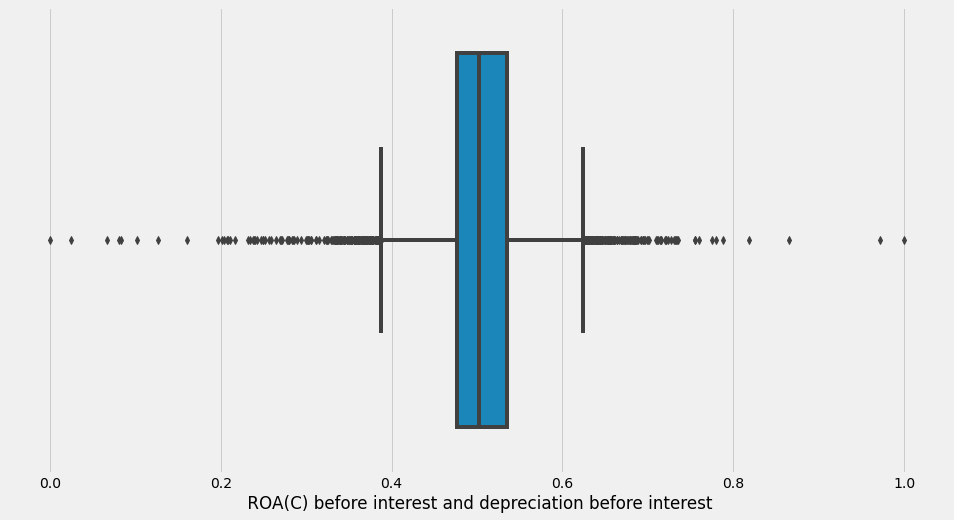

In [8]:
sns.boxplot(df[' ROA(C) before interest and depreciation before interest'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


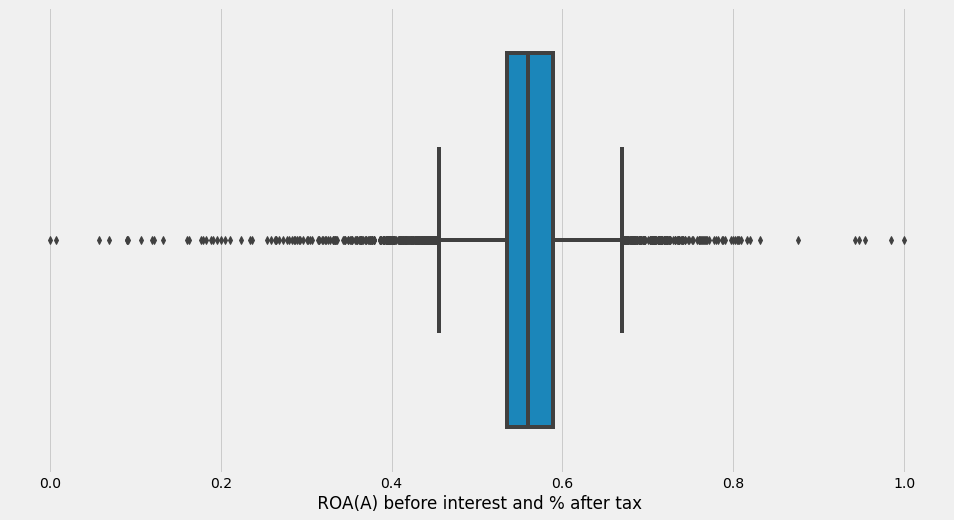

In [9]:
sns.boxplot(df[' ROA(A) before interest and % after tax'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


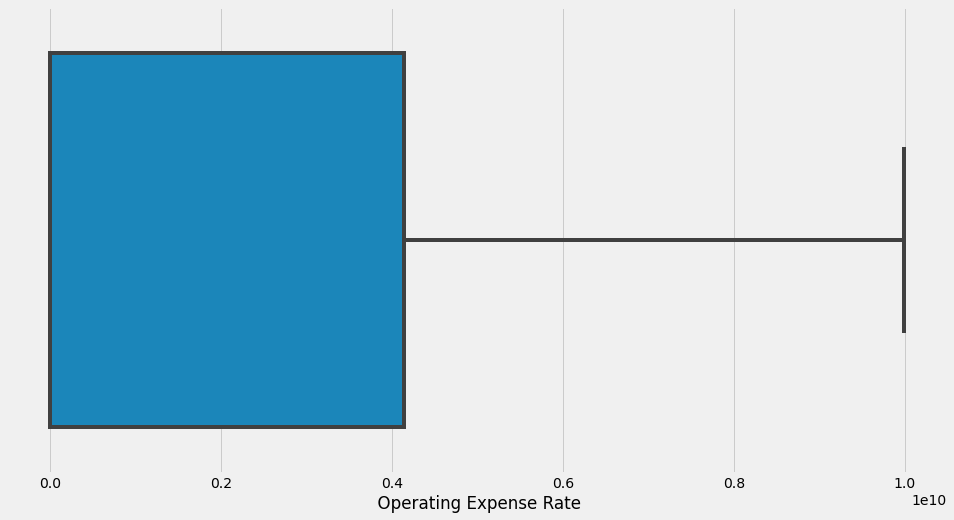

In [10]:
## df[' Operating Expense Rate'] = df[' Operating Expense Rate'] / 10 ** 10
sns.boxplot(df[' Operating Expense Rate'])

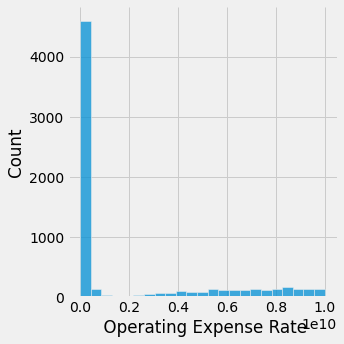

In [11]:
sns.displot(df[' Operating Expense Rate'])

***Which variables have the maximum value of greater than 1.0?***

In [12]:
odds_dict = {}
odds_list = []

for col in df.columns:
  if df[col].max() > 1.0:
    odds_dict[col] = df[col].max()
    odds_list.append(col)

odds_dict

{' Accounts Receivable Turnover': 9740000000.0,
 ' Allocation rate per person': 9570000000.0,
 ' Average Collection Days': 9730000000.0,
 ' Cash Turnover Rate': 10000000000.0,
 ' Cash/Current Liability': 9650000000.0,
 ' Current Asset Turnover Rate': 10000000000.0,
 ' Current Ratio': 2750000000.0,
 ' Fixed Assets Turnover Frequency': 9990000000.0,
 ' Fixed Assets to Assets': 8320000000.0,
 ' Interest-bearing debt interest rate': 990000000.0,
 ' Inventory Turnover Rate (times)': 9990000000.0,
 ' Inventory/Current Liability': 9910000000.0,
 ' Long-term Liability to Current Assets': 9540000000.0,
 ' Net Value Growth Rate': 9330000000.0,
 ' Operating Expense Rate': 9990000000.0,
 ' Quick Asset Turnover Rate': 10000000000.0,
 ' Quick Assets/Current Liability': 8820000000.0,
 ' Quick Ratio': 9230000000.0,
 ' Research and development expense rate': 9980000000.0,
 ' Revenue Per Share (Yuan ¥)': 3020000000.0,
 ' Revenue per person': 8810000000.0,
 ' Total Asset Growth Rate': 9990000000.0,
 ' To

In [13]:
len(odds_dict)

24

There are 23 such variables. As we discussed earlier, we'll normalize all these variables.

In [14]:
## A function for normalization

def normalization(df, columns):
  for col in columns:
    maximum = df[col].max()
    minimum = df[col].min()
    n = maximum - minimum
    df[col] = (maximum - df[col]) / n 
  return df

In [15]:
## df[odds_list] = df[odds_list] / 10 ** 10

In [16]:
## Normalizing the variables

df = normalization(df, odds_list)

In [17]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,0.998103,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,0.038335,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,1.000000,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,1.000000,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,1.000000,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


The concerned variables have been normalized now.

***The Target Variable***

The target variable is a binary variable. But what is the distribution of both the variables in it?

In [18]:
print(df['Bankrupt?'].value_counts())
print('--------------------------------------')
print(df['Bankrupt?'].value_counts(normalize = True))

0    6599
1     220
Name: Bankrupt?, dtype: int64
--------------------------------------
0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64


With one class representing almost 97% of the dataset, there is clearly a class imbalance in the dataset.

Why are classes not evenly distributed?

It is the ideal situation, as one will expect only a fraction of the companies to be bankrupt. 

# Machine Learning

In [19]:
## Splitting the dataset into
## training and validation sets
## in the default 67:33 ratio

X = df.copy()
y = X.pop('Bankrupt?')

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42)

In [20]:
## What is the distribution of the 
## classes in the training set

print(y_train.value_counts())
print('--------------------------------------')
print(y_train.value_counts(normalize = True))

0    4952
1     162
Name: Bankrupt?, dtype: int64
--------------------------------------
0    0.968322
1    0.031678
Name: Bankrupt?, dtype: float64


The distribution of the classes in the validation shouldn't matter as much as their distribution in the training set.

*Even distribution of the classes*

The even distribution of the classes is one way of ensuring that the model at hand is not biased towards one class. It [ensuring even distribution] could be done in two ways.

1. Oversampling
2. Undersampling

We'll use oversampling for this project

*Why not undersampling?*

Because in the training set, only a meagre no. of records (169) belong to class 1. Even in the whole dataset, only 220 records pertain to this class. So even if we do undersampling on the larger dataset, we'll be left only with 220 records which will be very less considering the high dimensionality in the dataset. Now, considering that there are almost 6600 records corresponding to the negative class (0), undersampling will be equivalent to losing a large chunk of data. So we should oversample the dataset instead. For now the training dataset.

*By which method?*

We'll use SMOTE.

***SMOTE on the training set***

In [21]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(X_smote))

Original dataset shape 5114
Resampled dataset shape 9904


In [22]:
## verifying the distribution
## in the new training dataset

print(y_smote.value_counts())
print('--------------------------------------')
print(y_smote.value_counts(normalize = True))

0    4952
1    4952
Name: Bankrupt?, dtype: int64
--------------------------------------
0    0.5
1    0.5
Name: Bankrupt?, dtype: float64


***Fitting the models and making predictions***

We'll use many different ML models to make predictions and use accuracy to compare their performances

In [23]:
## Importing the models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

In [24]:
## Function to fit and validate the models
## using the training and validation sets

def Fit_Score(model, X_train, y_train, X_val, y_val):
  model.fit(X_train, y_train)
  training_score = model.score(X_train, y_train)
  validation_score = model.score(X_val, y_val)
  print("Training score is: {}".format(training_score))
  print("Validation score is: {}".format(validation_score))
  print("------------------------------------------------\n")

In [25]:
## Runnning the models

lr, svc, gbc, rfc, abc, lgbm = LogisticRegression(), SVC(), GradientBoostingClassifier(), RandomForestClassifier(),\
                               AdaBoostClassifier(), LGBMClassifier()

models = [lr, svc, gbc, rfc, abc, lgbm]

for model in models:
  Fit_Score(model, X_smote, y_smote, X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training score is: 0.8883279483037156
Validation score is: 0.8680351906158358
------------------------------------------------

Training score is: 0.9090266558966075
Validation score is: 0.8780058651026393
------------------------------------------------

Training score is: 0.9725363489499192
Validation score is: 0.9284457478005865
------------------------------------------------

Training score is: 1.0
Validation score is: 0.9530791788856305
------------------------------------------------

Training score is: 0.9486066235864298
Validation score is: 0.9225806451612903
------------------------------------------------

Training score is: 1.0
Validation score is: 0.9624633431085043
------------------------------------------------



On the face of it, the LGBM classifier seems to perform particularly better followed by Random Forest and Gradient Boosting.

*Does the distribution the classes in the validation set make any difference?*

Earlier we oversampled the training dataset. Of course there's a class imbalance in the validation set also. What if the classes were uniformly distributed in the validation set also? Will that make any difference to the corresponding accuracies? Let's take it as a case study and employ SMOTe on the validation set also.

***SMOTE on the validation set***

In [26]:
## SMOTE on the validation set

X_val_smote, y_val_smote = smote.fit_resample(X_val, y_val)
print('Original dataset shape', len(X_val))
print('Resampled dataset shape', len(X_val_smote))

Original dataset shape 1705
Resampled dataset shape 3294


In [27]:
## Executing the models again

for model in models:
  Fit_Score(model, X_smote, y_smote, X_val_smote, y_val_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training score is: 0.8883279483037156
Validation score is: 0.8876745598057073
------------------------------------------------

Training score is: 0.9090266558966075
Validation score is: 0.8989071038251366
------------------------------------------------

Training score is: 0.9725363489499192
Validation score is: 0.8901032179720705
------------------------------------------------

Training score is: 1.0
Validation score is: 0.8621736490588949
------------------------------------------------

Training score is: 0.9486066235864298
Validation score is: 0.8600485731633273
------------------------------------------------

Training score is: 1.0
Validation score is: 0.8989071038251366
------------------------------------------------



In [28]:
count = 0

for i in models:
  count += 1
  print(count)
  print(i)
  print('\n')

1
LogisticRegression()


2
SVC()


3
GradientBoostingClassifier()


4
RandomForestClassifier()


5
AdaBoostClassifier()


6
LGBMClassifier()




This time, the picture is little different. Though the accuracies are in the same order as before, the validation accuracies tell a different story. In terms of the validation accuracy, the Random Forest performs slightly better than LGBM and quite better than the Gradient Boosting. In terms of the difference between the traning and validation sets also, the Random Forest is ahead.

Looks like, we're at a cross road now. Let's employ cross validation to break this impasse. 

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
## Function for cross validation scores

def Fit_CVScore(model, X, y, cv = 5):
  scores = cross_val_score(model, X, y, cv = cv)
  print("The CV scores are: {}".format(scores))
  print("The avg CV score is: {}".format(np.mean(scores)))
  print("------------------------------------------------\n")

We'll use CV score on the entire dataset (not the training set alone). For that, we have to use SMOTE on the whole dataset.

In [31]:
## Employing SMOTE on the entire dataset

X1, y1 = smote.fit_resample(X, y)
print('Original dataset shape', len(X))
print('Resampled dataset shape', len(X1))

Original dataset shape 6819
Resampled dataset shape 13198


In [32]:
## Running the models for CV scores

for model in models:
  Fit_CVScore(model, X1, y1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The CV scores are: [0.8655303  0.81401515 0.90984848 0.90905646 0.91246684]
The avg CV score is: 0.8821834487351727
------------------------------------------------

The CV scores are: [0.8655303  0.84128788 0.92424242 0.91966654 0.93065555]
The avg CV score is: 0.8962765395524016
------------------------------------------------

The CV scores are: [0.91969697 0.91780303 0.96401515 0.95680182 0.9674119 ]
The avg CV score is: 0.9451457737664635
------------------------------------------------

The CV scores are: [0.95643939 0.95681818 0.98143939 0.98219022 0.9867374 ]
The avg CV score is: 0.9727249187594014
------------------------------------------------

The CV scores are: [0.89015152 0.88939394 0.94507576 0.93747632 0.94240243]
The avg CV score is: 0.9208999908137839
------------------------------------------------

The CV scores are: [0.95416667 0.95265152 0.98977273 0.98901099 0.98976885]
The avg CV score is: 0.9750741499879432
------------------------------------------------



The LGBM classifier works best followed by the Gradient Boosting classifier. So, we'll use it to make predictions.

# Principal Component Analysis

The high dimensinality didn't pose a problem apparently. However, it would be good to contain the high dimensionality in the dataset in few dimensions. So, let's use PCA.  

In [33]:
from sklearn.decomposition import PCA

Let's first make n (no. of features) components and estimate the amount of variances explained by them. After that, we'll select a few components that explain most of the variance in the dataset.

In [34]:
pca = PCA()
pca.fit(X1)
print(pca.explained_variance_ratio_)

[1.75473049e-01 1.45370364e-01 1.03096820e-01 9.43175606e-02
 7.82013535e-02 6.84184953e-02 5.90477213e-02 5.72127309e-02
 5.27040278e-02 3.87557054e-02 2.84332929e-02 1.44325154e-02
 1.30639259e-02 8.69919121e-03 7.41743027e-03 6.82721961e-03
 5.58438054e-03 5.39559864e-03 3.62037572e-03 3.11463287e-03
 2.88362212e-03 2.78236698e-03 2.63495747e-03 2.36551314e-03
 2.04702082e-03 1.94722785e-03 1.50313319e-03 1.29669265e-03
 1.16713377e-03 1.03398696e-03 8.15006563e-04 8.01863673e-04
 7.11951623e-04 6.46775181e-04 6.42963845e-04 5.57812194e-04
 5.25146391e-04 4.52055602e-04 4.42410166e-04 4.25749665e-04
 3.91564118e-04 3.78831962e-04 3.68169185e-04 3.34015514e-04
 3.19362389e-04 2.57433368e-04 2.30037930e-04 2.10758966e-04
 2.07585942e-04 2.02092395e-04 1.81974227e-04 1.76226135e-04
 1.59989266e-04 1.42824056e-04 1.38128088e-04 1.28621053e-04
 1.26093222e-04 1.08950347e-04 1.07719132e-04 9.68921518e-05
 9.33129985e-05 8.68699244e-05 7.91527622e-05 7.01430470e-05
 6.72150317e-05 6.378280

<BarContainer object of 95 artists>

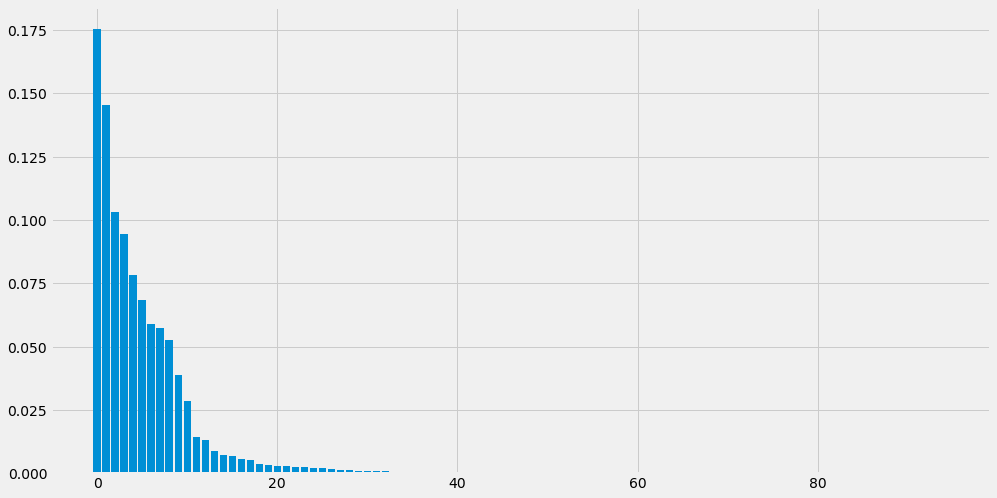

In [35]:
## Plotting the variances

plt.bar(range(95), pca.explained_variance_ratio_)

Almost 100% of the variance could be explained by almost 30 components. So, let's fit the PCA again. This time, with 30 components.

In [36]:
pca = PCA(30)
X_pca = pd.DataFrame(pca.fit_transform(X1))

X_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.390759,-0.013013,0.067962,-0.218568,-0.342709,-0.195671,-0.135505,-0.227790,0.202593,-0.212810,...,0.008151,-0.006387,-0.009586,-0.016933,-0.000177,0.025586,-0.015809,0.017022,0.006498,-0.013168
1,0.655120,-0.377311,0.625629,0.510633,-0.126222,-0.270354,-0.323664,-0.089253,0.151233,0.126341,...,-0.005595,0.007506,-0.010270,0.000753,0.007251,0.016338,-0.005593,0.011173,0.010734,0.007141
2,0.006603,-0.443922,-0.241241,-0.130216,-0.054375,-0.266691,-0.076743,-0.117520,0.051008,0.010450,...,0.004834,0.003982,-0.003084,0.004770,-0.032025,0.003894,-0.011184,0.011080,-0.006141,0.008947
3,0.939481,-0.244187,0.355617,0.041194,-0.252291,0.177966,0.308262,0.418792,-0.466614,0.151029,...,-0.012763,0.001710,0.000039,0.003720,0.004623,0.006523,0.029975,-0.011906,-0.002340,0.033450
4,0.332011,0.720325,-0.360050,0.076145,-0.159151,-0.110086,0.038090,0.192474,-0.245028,-0.163279,...,-0.012126,-0.006464,-0.000689,0.003004,-0.000597,-0.019361,-0.010038,-0.031429,-0.007005,-0.006207


In [37]:
## Avg. CV scores on the PCs 

for model in models:
  Fit_CVScore(model, X_pca, y1)

The CV scores are: [0.8655303  0.81628788 0.90795455 0.90678287 0.91019326]
The avg CV score is: 0.8813497709187365
------------------------------------------------

The CV scores are: [0.92424242 0.90568182 0.97007576 0.96665404 0.97271694]
The avg CV score is: 0.9478741947707464
------------------------------------------------

The CV scores are: [0.90606061 0.89924242 0.95530303 0.95452823 0.96400152]
The avg CV score is: 0.9358271613444028
------------------------------------------------

The CV scores are: [0.96477273 0.96098485 0.98825758 0.98749526 0.98901099]
The avg CV score is: 0.9781042807766946
------------------------------------------------

The CV scores are: [0.85       0.85075758 0.91022727 0.90943539 0.91739295]
The avg CV score is: 0.8875626385109143
------------------------------------------------

The CV scores are: [0.95719697 0.94204545 0.98712121 0.98181129 0.98863206]
The avg CV score is: 0.9713613972234661
------------------------------------------------



On the new dataset - the PCs - Random Forest apparently performs the best.

In [38]:
models

[LogisticRegression(),
 SVC(),
 GradientBoostingClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 LGBMClassifier()]

***Hyperparameter Tuning***

In [39]:
final_model = RandomForestClassifier()
final_model.fit(X_pca, y1)

RandomForestClassifier()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
decision_trees = [110, 150, 180, 200, 250, 300, 350, 400]

parameters = {'n_estimators': decision_trees}

gscv = GridSearchCV(final_model, parameters, scoring = 'accuracy', cv = 5)
gscv.fit(X_pca, y1)

print("The best fit values are :" ,gscv.best_params_)
print("\nUsing ",gscv.best_params_, " accuracy is: ", gscv.best_score_)

The best fit values are : {'n_estimators': 350}

Using  {'n_estimators': 350}  accuracy is:  0.9787863860277654


In [42]:
final_model = RandomForestClassifier(n_estimators = 400)
Fit_CVScore(final_model, X_pca, y1)

The CV scores are: [0.96439394 0.96287879 0.98863636 0.98938992 0.99014778]
The avg CV score is: 0.9790893589169452
------------------------------------------------



# Conclusion

The task of prediction was realized in two broad ways:

1. Oversampling using SMOTE, and
2. Dimensionality Reduction using Principal Component Analysis.

It should be noted that the latter didn't improve the situation much than what it was before. Even a tuned Random Forest - that performed the best on the PC dataset - didn't help improve the accuracy. So the author proposes a LightGBM on the usual data. Of course PCA could be used on the test set and if so, the Random Forest would be advisable, but wjhy take the pain of dimensionality reduction if little or less gains are being made from that. 

The author used SMOTE as it was at his discretion. While the idea of undersampling was rejected, cost sensitive learning, though in the sight of the author, was not employed for no particular reason. Moreover, had the dataset been significantly large, the author might have advised using the dataset as it is.